__PREMENDRA KIRPAL__
<br>
Date: Jan. 12, 2021
<br>
PHYS 2030 W22

# <center><font color=#46769B>Exercise 1: Error propagation via random sampling</font></center>

## <font color=#46769B>Introduction:</font>

Our goals for this notebook are:
- Practice with sampling from normal distributions.
- Practice some basics of using `numpy` and `matplotlib.pyplot`.
- Learn a new technique for propagation of errors.

Required reading:
- *Lesson 1: Normal distributions*

Guidelines: 
- You are allowed to use resources such as websites or textbooks if you need help figuring things out. 
- You are *not allowed* to work with any collaborators on this assignment, including your peers or tutoring services.

By submitting this assignment, you acknowledge: 
- Any code written here is the result of your own work and is written by you.
- Any information sources (e.g., websites) used outside of the course material will be *cited* (provide URLs). 

## <font color=#46769B>Error propagation:</font>

In lab courses, it is standard practice to do error propagation. For example, suppose you have two measured quantities $A,B$. That is, you have their mean values $\langle A \rangle$, $\langle B\rangle$, and their uncertainties $\Delta A,\Delta B$. 
Now suppose you want to calculate the mean and error for a new quantity $C = f(A,B)$ that is a function of $A,B$. What do you do?
- Take the mean to be $\langle C \rangle = f(\langle A \rangle, \langle B \rangle)$. But you may wonder: is this an approximation or is it always true? 
- Calculate the error $\Delta C$ using the rules for error propagation. How straightforward this is depends on how complex $f$ is (and how well one remembers the rules).

Random sampling is another way to approach this problem. There is just one procedure to remember.
- Generate random samples for $A$ and $B$. That is, you generate a list of $N$ values for each quantity<font color=red>$^1$</font>
$$\left(A_0, A_1, ..., A_{N-1}\right) \, ,  \qquad \left(B_0, B_1, ..., B_{N-1}\right)\, .$$
- For every pair $A_i, B_i$, compute $C_i = f(A_i, B_i)$ to generate samples for $C$:
$$\left(C_0, C_1, ..., C_{N-1}\right)\, .$$
- Using your samples for $C$, calculate the mean value $\langle C \rangle$ and standard deviation for $\Delta C$.

There are two things to keep in mind:
- $N$ must be large enough so that your values for $\langle C \rangle$ and $\Delta C$ converge, i.e., you get the same result (up to significant figures) for multiple simulations.
- How you sample quantities $A,B$ is up to you. A normal distribution is typically *default* assumption for how to sample, especially if the errors quoted for $A,B$ are *random* or *statitistical* errors.<font color=red>$^2$</font> But you can sample in a different way if you have more information about the problem, or if you want to include systematic errors (we will see an example below).

### <font color=#46769B>Footnotes:</font>

<font color=red>$^1$</font> Note since Python counting starts at zero, I will follow the same numbering conventions though it looks a bit messier.

<font color=red>$^2$</font> *Random* errors are due to the fact that repeated measurements will not give exactly the same results each time, due to unpredictable differences in the measurement setup or observer. This is why one performs multiple measurements and averages over them. For example, you measure a length with a ruler and get ten slightly different numbers each time. In contrast, *systematic* errors are errors that are the same for all measurements. For example, suppose your ruler is of poor quality and all lengths skewed too short by 5\%.


## <font color=#46769B>Part 1: Pendulum</font>

The standard formula for the oscillation period of a pendulum is
$$T = 2\pi \sqrt{L/g}$$
where $g$ is the gravitational acceleration and $L$ is the length of the pendulum. Suppose we have measured the period and length of the pendulum to be:
$$T = 1.835 \pm 0.005 \; {\rm s} \, , \qquad L = 0.855 \pm 0.002 \; {\rm m} \, .$$

### <font color=#46769B>Part (1a)</font>
Using random sampling for $T$ and $L$, determine $g$, with a sample size of $N=100$.
- Assume the errors quoted for $T$ and $L$ are random errors and generate samples using a normal distribution.
- Determine both the mean $\langle g \rangle$ and uncertainty $\Delta g$. Write *your own* code for calculating the mean and standard deviations for your samples for $g$ and verify that it agrees with what you get using `numpy.mean` and `numpy.std`.
- Plot a histogram for your samples for $g$, choosing a suitable number of histogram bins.

### <font color=#46769B>Part (2b)</font>
- Repeat part (a) for a larger value of $N$ where your results have converged.
- Compare your histogram for $g$ to a normal distribution of mean $\mu=\langle g \rangle$ and standard deviation $\sigma = \Delta g$. (Make a plot of the normal distribution on top of the histogram. Be sure to normalize your histogram and choose a suitable number of bins.)

(array([ 1.,  1.,  6., 11., 16., 23., 21., 11.,  9.,  1.]),
 array([18.18043491, 18.21806764, 18.25570036, 18.29333309, 18.33096582,
        18.36859855, 18.40623128, 18.44386401, 18.48149674, 18.51912947,
        18.5567622 ]),
 <a list of 10 Patch objects>)

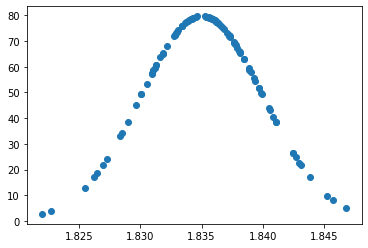

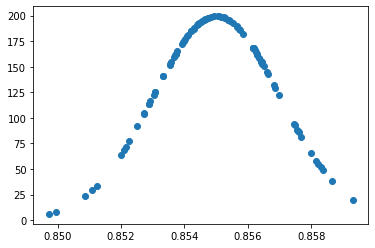

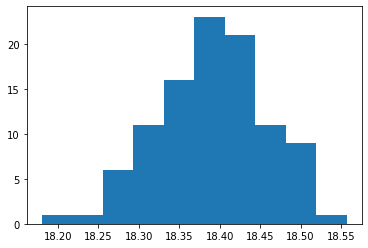

In [ ]:
# Your answer to exercise 1 here
import numpy as np
import matplotlib.pyplot as plt
#1a mu-mean , sigma- standard deviation
muT=1.835
muL=0.855
sigmaT=0.005
sigmaL=0.002
N=100
xT=np.random.normal(muT,sigmaT,N)
yT=1/np.sqrt(2*np.pi*sigmaT**2)*np.exp(-0.5*(xT-muT)**2/sigmaT**2)
xL=np.random.normal(muL,sigmaL,N)
yL=1/np.sqrt(2*np.pi*sigmaL**2)*np.exp(-0.5*(xL-muL)**2/sigmaL**2)
plt.figure(1)
plt.scatter(xT,yT)
plt.figure(2)
plt.scatter(xL,yL)

g=(4*np.pi**2)/xT*(xL)
mu_g=np.sum(g)/N
sigma_g=np.sqrt((1/N)*(np.sum(g-mu_g)**2))
np.mean(g)==mu_g
np.std(g)==sigma_g
plt.figure(3)
plt.hist(g)


## <font color=#46769B>Part 2: Pendulum continued</font>

Here we will consider the same example with an extra source of systematic error.

Suppose we learn that the timing setup used for measuring the period $T$ may suffer from a uniform time delay $\delta T$ from starting and stopping. That is, oscillation formula becomes
$$T_0 = 2\pi \sqrt{L/g}$$
where $T_0 = T + \delta T$ is the *true* oscillation period and $T$ is the quantity we measure (given above). 

Suppose we know that $\delta T$ is between $0-0.05$ s, but is otherwise unknown and all values in this range are equally likely. It makes sense to sample $\delta T$ from a uniform distribution in the range $[0,0.05]$. (That is, you will sample $T_0$ as the *sum* of a normally-distributed variable $T$ and a uniformly sampled variable $\delta T$.)

- Using the values quoted above for $T$ and $L$, and including $\delta T$ in your analysis, determine the mean value and uncertainty for $g$ (choose $N$ large enough so that these values have converged).

- Compare your histogram for $g$ to a normal distribution of mean $\mu=\langle g \rangle$ and standard deviation $\sigma = \Delta g$. (Make a plot of the normal distribution on top of the histogram. Be sure to normalize your histogram and choose a suitable number of bins.)

In [ ]:
# Your answer to exercise 2 here
